# EDAV data access via Web Coverage Service

Example demonstrating the retrieval of raster data from EDAV via a Web Coverage Service(WCS). Data downloaded is full resolution and values, subsetted from data hosted in MAAP.

We use `OWSlib` a python library for interacting with OGC services.

## Setting up the environment

We start by installing libraries that will be used to query the WCS endpoint, and then to load, explore, and plot the raster data.

In [5]:
%pip install -q rasterio
%pip install -q rio-cogeo
%pip install -q owslib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import rasterio as rio
from rasterio.plot import show
from owslib.wcs import WebCoverageService


## Query WCS

Now let's send a request to the EDAV WCS and extract a subset of the data in GeoTiff format and save it to our workspace.

In [8]:
# Configure the WCS source
EDAV_WCS_Base = "https://edav-wcs.adamplatform.eu/wcs"
wcs = WebCoverageService(f'{EDAV_WCS_Base}?service=WCS', version='2.0.0')

In [13]:
# Request the data from WCS
response = wcs.getCoverage(
    identifier=['uavsar_AfriSAR_v1_SLC'],
    format='image/tiff',
    filter='false',
    scale=1,
    subsets=[('Long',11.6,11.7),('Lat',-0.2,-0.1)]
)

# Save the results to file as a tif
results = "EDAV_example.tif"
with open(results, 'wb') as file:
    file.write(response.read())


Now to do a quick check that the data is valid, and contains spatial metadata. For fun we can check if it's a Cloud Optimized Geotiff. 

In [29]:
!gdalinfo {results}
!rio cogeo validate {results}

Driver: GTiff/GeoTIFF
Files: EDAV_example.tif
Size is 709, 709
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (11.599925815140329,-0.099890569280316)
Pixel Size = (0.000141205421952,-0.000141205421952)
Metadata:
  AREA_OR_POINT=Area
  OVR_RESAMPLING_ALG=BILINEAR
Image Structure Metadata:
  COMPRESSION=LZW
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  11.5999258,  -0.0998906) ( 11d35'59.73"E,  0d 5'59.61"S)
Lower Left  (  11.5999258,  -0.2000052) ( 11d35'59.73"E,  

## Read the Data

Now it's time to read the data and do some quick visual exploration.

In [65]:
# Read in the results 
with rio.open(results, 'r') as src:
        rast = src.read()

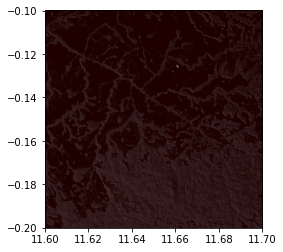

<AxesSubplot:>

In [40]:
# Make a plot
show(rast, transform=src.transform, cmap='pink')

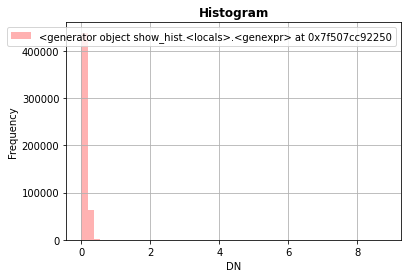

In [38]:
# It's kind of dark, find out why
from rasterio.plot import show_hist
show_hist(rast, 
          bins=50, 
          lw=0.0, 
          stacked=False, 
          alpha=0.3,
          histtype='stepfilled', 
          title="Histogram"
         )

# Oh skewed distribution

In [46]:
# We can fix that dark plot working directly with matplotlib
import matplotlib.pyplot as plt
import numpy as np

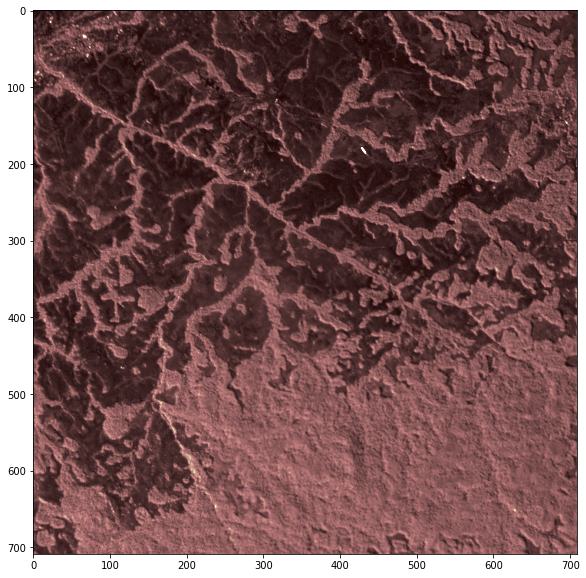

In [54]:
fig, ax = plt.subplots(1, figsize=(8, 8))
edavplot = ax.imshow(np.squeeze(rast), cmap='pink')
edavplot.set_clim(0,0.75)
plt.show()

## Newer Methods rioxarray

A newer approach to working with raster data, rio+xarray

In [56]:
%pip install -q rioxarray

Note: you may need to restart the kernel to use updated packages.


In [57]:
import rioxarray

In [58]:
edav_x = rioxarray.open_rasterio(results)

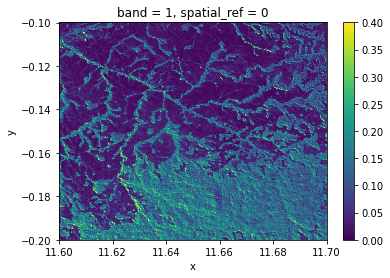

In [64]:
edav_x.plot(cmap="gist_earth", figsize=(10,8)).set_clim(0,0.4)

## References

* WCS Adapted from: Jan Verbesselt, Jorge Mendes de Jesus, Aldo Bergsma, Dainius Masiliūnas, David Swinkels, Corné Vreugdenhil. Handling Raster data with Python - 2020-01-20 https://geoscripting-wur.github.io/PythonRaster/
* OWSLib https://github.com/geopython/OWSLib
* rioxarray https://corteva.github.io/rioxarray



